# Deep Neural Networks
Add hidden layers to your network to uncover complex relationships.


# 🧠 Introduction to Deep Learning with Keras & TensorFlow

In this lesson, we're exploring how to build **deep neural networks** capable of learning the complex kinds of relationships that make deep learning so powerful.

The **key idea** is **modularity**: we build up complex networks by stacking simple, functional units like LEGO blocks. We started with the basics — a **linear unit**:

```python
y = w * x + b
```

But linear units alone can only model straight lines. To go beyond that, we need **layers**, **nonlinearities**, and some clever combinations.

---

## 🧱 Layers: Building Blocks of Neural Networks

Neural networks are organized into **layers**, each transforming the data a little more as it flows through the model.

- A **Dense layer** is just a group of linear units that all share the same inputs.
- A **stack of layers** allows us to build more complex relationships step by step.

Think of each layer as a transformation. The deeper we go, the more complex and powerful the transformation becomes.

> A dense layer is defined like this in Keras:
```python
layers.Dense(units=4, input_shape=[2])
```

---

## ⚙️ Many Kinds of Layers

In Keras, a layer can be **any transformation** of data:
- Dense (fully connected)
- Convolutional (for images)
- Recurrent (for sequences)
- Normalization, Dropout, etc.

We can mix and match them to suit our problem — it's one of the coolest parts of building deep learning models!

---

## 🔁 Activation Functions: Adding Non-Linearity

Without activation functions, stacking Dense layers wouldn't make the model any more powerful — it would still just be one big linear transformation.

That’s why we use **activation functions** like:

```python
ReLU(x) = max(0, x)
```

This is the most common one — short for **Rectified Linear Unit**.

It introduces **non-linearity**, which lets the network learn curved patterns and complex decision boundaries.

---

## 🔗 Stacking Layers: The Fully-Connected Network

By combining multiple Dense layers with ReLU activations, we build what's called a **fully-connected network**.

Here's an example:

```python
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # Hidden layers with ReLU activations
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # Final output layer (no activation for regression)
    layers.Dense(units=1),
])
```

- We start with a 2-input layer.
- Add hidden layers with ReLU.
- End with a single output (great for **regression** tasks).

> We use `Sequential` to chain the layers together from input to output. Just pass the layers as a list.

---

## 🚀 Summary

- **Linear units** form the core of our network.
- **Dense layers** organize them into powerful blocks.
- **Activation functions** like ReLU let us break free of linearity.
- **Sequential models** make it easy to stack and build deep architectures.

We're now ready to move on to training these models and teaching them to learn from data. Let's go! 🔥


In [8]:
import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd

concrete = pd.read_csv('dl-course-data/concrete.csv')
concrete.head()
print("shape of concrete:",concrete.shape)

shape of concrete: (1030, 9)


# 1) Input Shape #

The target for this task is the column `'CompressiveStrength'`. The remaining columns are the features we'll use as inputs.

input_shape = [8]

# 2) Define a Model with Hidden Layers #

Now create a model with three hidden layers, each having 512 units and the ReLU activation.  Be sure to include an output layer of one unit and no activation, and also `input_shape` as an argument to the first layer.

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
input_shape = [8]
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

c:\Users\samad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 3) Activation Layers #

Let's explore activations functions some.

The usual way of attaching an activation function to a `Dense` layer is to include it as part of the definition with the `activation` argument. Sometimes though you'll want to put some other layer between the `Dense` layer and its activation function. (We'll see an example of this in Lesson 5 with *batch normalization*.) In this case, we can define the activation in its own `Activation` layer, like so:

```
layers.Dense(units=8),
layers.Activation('relu')
```

This is completely equivalent to the ordinary way: `layers.Dense(units=8, activation='relu')`.

model = keras.Sequential([

        layers.Dense(32, input_shape=[8]),layers.Activation('relu'),
    
        layers.Dense(32),layers.Activation('relu'),
    
        layers.Dense(1),
])


# Alternatives to ReLU #

There is a whole family of variants of the `'relu'` activation -- `'elu'`, `'selu'`, and `'swish'`, among others -- all of which we can use in Keras. Sometimes one activation will perform better than another on a given task, so we could consider experimenting with activations as we develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.

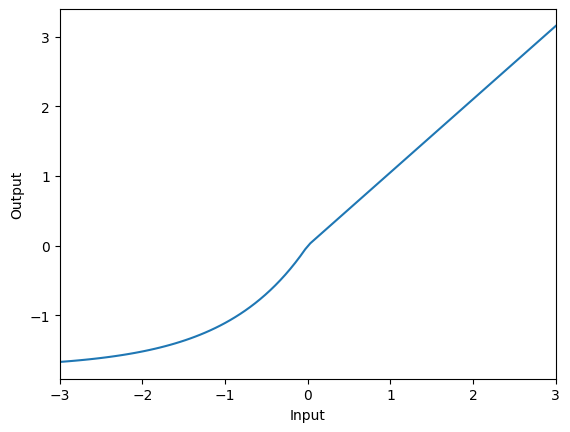

In [10]:
activation_layer = layers.Activation('selu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

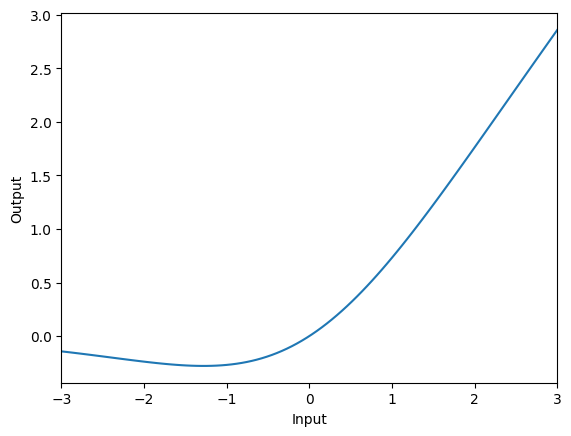

In [11]:
activation_layer = layers.Activation('swish')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

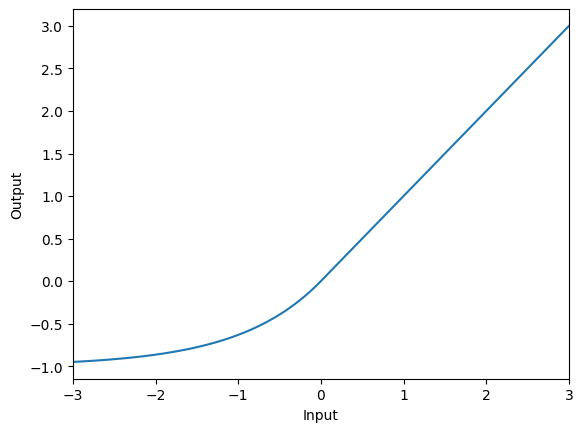

In [12]:
activation_layer = layers.Activation('elu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()